<a href="https://colab.research.google.com/github/AbelJames26/Project_Mining/blob/main/Final_draft_copy171122REV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [49]:
import numpy as np
import pandas as pd
import scipy as sp
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sqlite3
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
!pip install keras_tuner
import keras_tuner

print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.9.2


**Import Data Set**

In [51]:
Path = "/content/17112022_Project_Data.csv"
df = pd.read_csv(Path)
df.shape

(904, 14)

Visualize dataset

In [52]:
#Displaying the data
df.head()

,COMMODITY,LATITUDE,LONGITUDE,SITE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,DATE,GOLD_PRICE_USD,MINERAL_LAND_VALUE_USD,COMM_CODE
0,Gold,-20.771948,122.201825,Anketell Shelf,108.1,0.711064,76866.00,23.0,0.44,76866.00,1/10/2022,1662.4,38235.2,1
1,Gold,-21.727803,122.640676,Anketell Shelf,92.0,0.235652,216.80,25.0,0.44,326.80,8/10/2022,1700.5,42512.5,1
2,Gold,-21.727803,122.640676,Anketell Shelf,92.0,1.857609,170900.00,25.0,3.00,245900.00,8/10/2022,1700.5,42512.5,1
3,Gold,-20.771948,122.201825,Anketell Shelf,108.1,0.147234,159.16,21.0,0.44,159.16,9/10/2022,1700.5,35710.5,1
4,Gold,-20.771948,122.201825,Anketell Shelf,108.1,0.538936,58259.00,25.0,3.00,58259.00,22/10/2022,1651.0,41275.0,1


Visualize Ore reserve locations 

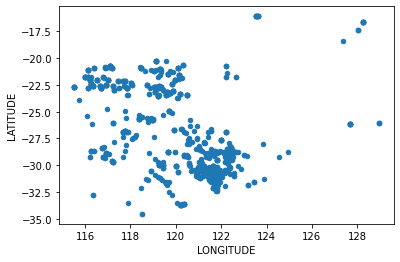

In [53]:
df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE")

**Check for Missing Data**

In [54]:
# Checking the null values

df.isna().any()

COMMODITY                 False
LATITUDE                  False
LONGITUDE                 False
SITE                      False
RES_QTY_MILLION_TONNES    False
RES_QTY_GRAM_TONNE        False
RES_CON_KILOGRAM          False
RV_QTY_million_tonnes     False
RV_QTY_G_GRAM_TONNE       False
POINT_SIZE_KILOGRAM       False
DATE                      False
GOLD_PRICE_USD            False
MINERAL_LAND_VALUE_USD    False
COMM_CODE                 False
dtype: bool

Count the number of Null Values in Each Column

In [55]:
# Count number of null values in each columns

df.isna().sum()

COMMODITY                 0
LATITUDE                  0
LONGITUDE                 0
SITE                      0
RES_QTY_MILLION_TONNES    0
RES_QTY_GRAM_TONNE        0
RES_CON_KILOGRAM          0
RV_QTY_million_tonnes     0
RV_QTY_G_GRAM_TONNE       0
POINT_SIZE_KILOGRAM       0
DATE                      0
GOLD_PRICE_USD            0
MINERAL_LAND_VALUE_USD    0
COMM_CODE                 0
dtype: int64

Drop NA Values if count is less than 5%

In [56]:
# We can drop the null value as their count is less than 5%

df.dropna(inplace=True)

**Shuffle data**

In [ ]:
df = df.sample(n=len(df),random_state =1)
df

**Convert Categorical variable to numeric. For Gold, Iron Nickel. Into three columns. 1 if it is that commodity or 0 if it isn't**

In [57]:
pd.get_dummies(df['COMMODITY']).head()

,Gold,Iron,Nickel
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


**Remove variables not used for prediction**

In [10]:
df = df.drop([ "SITE","DATE","LATITUDE", "LONGITUDE","COMMODITY"], axis =1)

In [11]:
df

,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,GOLD_PRICE_USD,MINERAL_LAND_VALUE_USD,COMM_CODE
0,108.1,0.711064,76866.00,23.0,0.44000,76866.00,1662.4,38235.20,1
1,92.0,0.235652,216.80,25.0,0.44000,326.80,1700.5,42512.50,1
2,92.0,1.857609,170900.00,25.0,3.00000,245900.00,1700.5,42512.50,1
3,108.1,0.147234,159.16,21.0,0.44000,159.16,1700.5,35710.50,1
4,108.1,0.538936,58259.00,25.0,3.00000,58259.00,1651.0,41275.00,1
...,...,...,...,...,...,...,...,...,...
899,353.0,1.301275,4593.50,201.6,1.64821,4593.50,1641.8,330986.88,3
900,353.0,0.041215,145490.00,201.6,1.64821,145490.00,1641.8,330986.88,3
901,353.0,3.613626,12756.10,201.6,1.64821,12756.10,1641.8,330986.88,3
902,353.0,0.181076,639.20,201.6,1.64821,639.20,1635.9,329797.44,3


**Data Normalization**

In [12]:
#df = df.iloc[:,1:]
df_norm=(df-df.mean())/df.std()
df_norm.head()

,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,GOLD_PRICE_USD,MINERAL_LAND_VALUE_USD,COMM_CODE
0,-0.178029,-0.518005,0.198306,-0.267079,-0.492902,0.167098,-0.150257,-0.266831,-1.239117
1,-0.183591,-0.545184,-0.159650,-0.262374,-0.492902,-0.175473,0.593618,-0.260856,-1.239117
2,-0.183591,-0.452459,0.637451,-0.262374,-0.345910,0.923653,0.593618,-0.260856,-1.239117
3,-0.178029,-0.550239,-0.159919,-0.271783,-0.492902,-0.176224,0.593618,-0.270357,-1.239117
4,-0.178029,-0.527846,0.111410,-0.262374,-0.345910,0.083817,-0.372834,-0.262585,-1.239117


**Code to convert predictiving value (Mineral_Land_Value_USD_Millions) back into price value from normalization**

In [13]:
y_mean = df['MINERAL_LAND_VALUE_USD'].mean()
y_std = df['MINERAL_LAND_VALUE_USD'].std()

def convert_label_value(pred): 
  return int(pred*y_std+y_mean)
print(convert_label_value (-0.266831)) # Validating function

38234


**Select Features**

In [14]:
X = df_norm.drop(columns='MINERAL_LAND_VALUE_USD')
X.head()

,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,GOLD_PRICE_USD,COMM_CODE
0,-0.178029,-0.518005,0.198306,-0.267079,-0.492902,0.167098,-0.150257,-1.239117
1,-0.183591,-0.545184,-0.159650,-0.262374,-0.492902,-0.175473,0.593618,-1.239117
2,-0.183591,-0.452459,0.637451,-0.262374,-0.345910,0.923653,0.593618,-1.239117
3,-0.178029,-0.550239,-0.159919,-0.271783,-0.492902,-0.176224,0.593618,-1.239117
4,-0.178029,-0.527846,0.111410,-0.262374,-0.345910,0.083817,-0.372834,-1.239117


**Select Labels**

In [15]:
Y = df_norm[['MINERAL_LAND_VALUE_USD']]
Y.head()

,MINERAL_LAND_VALUE_USD
0,-0.266831
1,-0.260856
2,-0.260856
3,-0.270357
4,-0.262585


**Data Partitioning**

Split Data into Training and Test set. 80& and 20% respectively.



In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(723, 8) (723, 1)
(181, 8) (181, 1)


**Create baseline DNN Model**

In [45]:
def build_model (hp): 
  model_1 = tf.keras.Sequential()

  model_1.add(tf.keras.layers.Dense(
      hp.Choice('units', [8,16,32]),
      activation = 'relu'))
  model_1.add(tf.keras.layers.Dense(1,activation = 'relu'))
  model_1.compile(loss ='mse', optimizer = 'adam')
  return model_1

Initialize the tuner with RandomSearch 

In [46]:
tuner= keras_tuner.RandomSearch(
    build_model,
    objective = 'val_loss',
    max_trials = 5)

Start Search for best model 

In [48]:
tuner.search(x_train,y_train, epochs =5, validation_data =(x_test,y_test))
best_model = tuner.get_best_models()[0]

In [34]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(8,input_shape = (8,), activation = 'relu'),
        tf.keras.layers.Dense(8,activation = 'relu'),
        tf.keras.layers.Dense(10,activation = 'relu'),
        tf.keras.layers.Dense(1)])
model.compile(loss = 'mse', optimizer = 'adam')
    

   

    


In [35]:
model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs = 100)

Epoch 1/100
23/23 [==============================] - 1s 9ms/step - loss: 0.7624 - val_loss: 1.4562
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6908 - val_loss: 1.2809
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6189 - val_loss: 1.1418
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5468 - val_loss: 0.9881
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4709 - val_loss: 0.8513
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4023 - val_loss: 0.6863
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3309 - val_loss: 0.5265
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2691 - val_loss: 0.3823
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2110 - val_loss: 0.2595
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1617 - val_loss: 0.1581
Epoch 11/

In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 8)                 72        
                                                                 
 dense_26 (Dense)            (None, 10)                90        
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


**Train DNN Model**


In [37]:
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
model = model
predict_on_untrained = model.predict(x_test)
history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs = 100, callbacks=[cb])

6/6 [==============================] - 0s 2ms/step
Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0031
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 10/100
23/23 [==============================] - 0s 3

Plot Training and Validation Loss

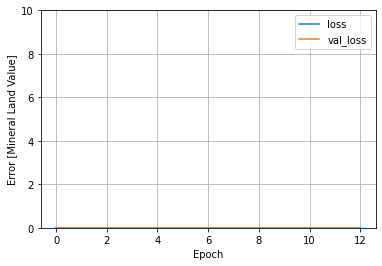

In [38]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Mineral Land Value]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

**Predictions**

In [ ]:
Preds_on_trained = model.predict(x_test)
Preds_on_trained.shape
Preds_on_trained
   

6/6 [==============================] - 0s 3ms/step


array([[-3.15620363e-01],
       [ 1.01424038e+00],
       [-1.72611758e-01],
       [ 6.95794702e-01],
       [-3.09123039e-01],
       [-2.96863496e-01],
       [-3.28375757e-01],
       [-1.96275041e-01],
       [-2.82008231e-01],
       [-3.16143811e-01],
       [-3.26369107e-01],
       [-3.51194590e-02],
       [-2.85189390e-01],
       [ 4.06794846e-02],
       [-2.96109378e-01],
       [-3.17819476e-01],
       [-2.42395982e-01],
       [ 2.50328588e+00],
       [-1.19134024e-01],
       [-2.94635177e-01],
       [-3.25071573e-01],
       [-2.16287121e-01],
       [-2.74111032e-01],
       [-3.31967235e-01],
       [-2.76898921e-01],
       [-3.10762167e-01],
       [-3.19685459e-01],
       [-2.62842655e-01],
       [-3.26261938e-01],
       [-3.15845788e-01],
       [ 1.46150768e-01],
       [-3.21018696e-01],
       [ 7.75825083e-02],
       [-1.85061738e-01],
       [-1.72123417e-01],
       [-2.71476686e-01],
       [ 7.29683578e-01],
       [-2.91637242e-01],
       [-3.2

Test on orignal dataset values

In [ ]:
test_data = np.array([-0.178029, -0.518005,	0.198306,	-0.267079,	-0.492902,	0.167098,	-0.150257,	-1.239117])

test_data.reshape(1,8)

array([[-0.178029, -0.518005,  0.198306, -0.267079, -0.492902,  0.167098,
        -0.150257, -1.239117]])

In [ ]:
print(model.predict(test_data.reshape(1,8),batch_size=1))

1/1 [==============================] - 0s 21ms/step
[[-0.29597604]]


In [ ]:
print('This is the value predicted mineral land value from input parameters',convert_label_value(-0.7161517),"Million USD dollars")

This is the value predicted mineral land value from input parameters -283459 Million USD dollars


**Creat User Interface**

This is when the customer enters in the parameters then they receive a predicted mineral price 

In [ ]:
print(' Welcome to our mineral land prediction software!!!','\n','If you would like to make a prediction, please enter the following values')
print('Input Parameters')
a= float(input('RES_QTY_MILLION_TONNES: '))
b = float(input('RES_QTY_GRAM_TONNE: '))
c = float(input('RES_CON_KILOGRAM: '))
d = float(input('RV_QTY_million_tonnes: '))
e = float(input('RV_QTY_AVG_GRAM_TONNE: '))
f = float(input('POINT_SIZE_KILOGRAM: '))
g = float(input('GOLD_PRICE_USD: '))
h = float(input('COMM_CODE: '))

testdata = np.array([a,b,c,d,e,f,g,h])
print('Mineral Land Value in USD Millions =>',model.predict(testdata.reshape(1,8),batch_size=1))


#print('This is the value predicted mineral land value from input parameters',convert_label_value(-0.7161517),"Million USD dollars")

 Welcome to our mineral land prediction software!!! 
 If you would like to make a prediction, please enter the following values
Input Parameters
RES_QTY_MILLION_TONNES: 123
RES_QTY_GRAM_TONNE: 3445
RES_CON_KILOGRAM: 644
RV_QTY_million_tonnes: 51561
RV_QTY_G_GRAM_TONNE: 15
POINT_SIZE_KILOGRAM): 51565
GOLD_PRICE_USD: 515151
COMM_CODE: 111
1/1 [==============================] - 0s 17ms/step
Mineral Land Value in USD Millions => [[18912.076]]


array([[18912.076]], dtype=float32)